In [5]:
# Loading up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [12]:
# Loading up csv
df = pd.read_csv(r"./csv/data_3600.csv")
print(df)

      Time    Price
0        0  1.25460
1        1  1.25670
2        2  1.25770
3        3  1.25790
4        4  1.25930
...    ...      ...
3596  3596  1.46380
3597  3597  1.46318
3598  3598  1.46328
3599  3599  1.46198
3600  3600  1.46148

[3601 rows x 2 columns]


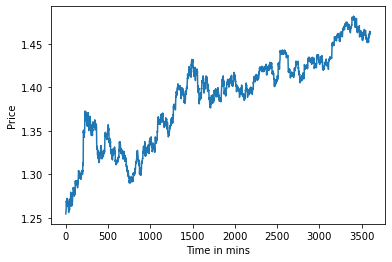

In [16]:
# Graphing raw data
plt.plot(df["Price"])
plt.ylabel('Price')
plt.xlabel('Time in mins')
plt.show()


In [17]:
# Crossover Strategy
# Bullish crossover occurs when the short-term SMA crosses above the long-term SMA. (BUY)
# Bearish crossover occurs when the short-term SMA crosses below the long-term SMA. (SELL)

In [29]:
# Defining Functions
def showPlot(data):
    plt.plot(data)
    plt.show()

def getSMA(windowSize, data):
    return data.rolling(window = windowSize).mean()

In [96]:
SMA1 = getSMA(1, df["Price"])
SMA5 = getSMA(5, df["Price"])
SMA10 = getSMA(10, df["Price"])
SMA20 = getSMA(20, df["Price"])
SMA30 = getSMA(30, df["Price"])
SMA50 = getSMA(50, df["Price"])

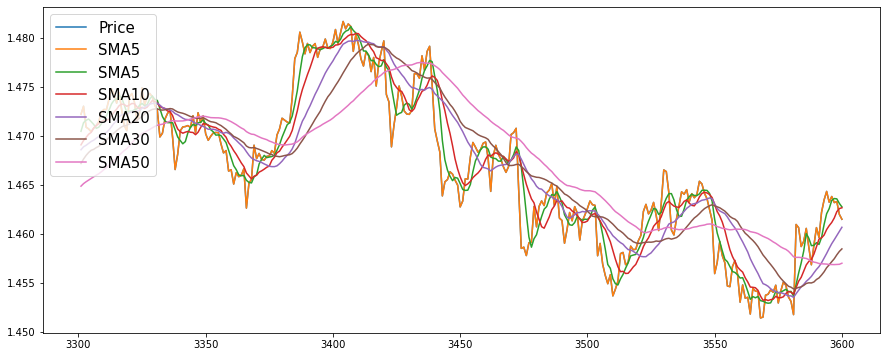

In [97]:
# taking last 300 trading days
plt.figure(figsize=(15, 6))
plt.plot(df["Price"][-300:], label='Price')
plt.plot(SMA1[-300:], label='SMA5')
plt.plot(SMA5[-300:], label='SMA5')
plt.plot(SMA10[-300:], label='SMA10')
plt.plot(SMA20[-300:], label='SMA20')
plt.plot(SMA30[-300:], label='SMA30')
plt.plot(SMA50[-300:], label='SMA50')
plt.legend(loc='upper left', fontsize=15)

In [98]:
def get_points_above(sma_low, sma_high):
    points_above = {}
    for pair in zip(sma_low, sma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index[0]
            points_above[date] = pair[0]
            
    points_above = pd.Series(points_above, name='Price_Points')
    points_above.index.name = 'Date'
            
    return points_above


In [99]:
points_above_SMA50 = get_points_above(SMA20, SMA50)
points_above_SMA30 = get_points_above(SMA5, SMA30)
points_above_SMA30

Date
49      1.264580
50      1.265240
51      1.266720
52      1.267920
53      1.269240
          ...   
3596    1.463396
3597    1.463594
3598    1.463560
3599    1.463092
3600    1.462744
Name: Price_Points, Length: 1947, dtype: float64

In [100]:
SMA5 = SMA5.reset_index()
SMA30 = SMA30.reset_index()

In [101]:
SMA1

0       1.25460
1       1.25670
2       1.25770
3       1.25790
4       1.25930
         ...   
3596    1.46380
3597    1.46318
3598    1.46328
3599    1.46198
3600    1.46148
Name: Price, Length: 3601, dtype: float64

In [102]:
crossovers = pd.DataFrame()
crossovers['index'] = SMA5['index']
crossovers['Price'] = [i for i in df['Price']]
crossovers['SMA5'] = SMA5['Price']
crossovers['SMA30'] = SMA30['Price']
crossovers['position'] = crossovers['SMA5'] >= crossovers['SMA30']
crossovers['pre-position'] = crossovers['position'].shift(1)
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)
crossovers['Crossover'][0] = False
print(crossovers)

      index    Price      SMA5     SMA30  position pre-position  Crossover
0         0  1.25460       NaN       NaN     False          NaN      False
1         1  1.25670       NaN       NaN     False        False      False
2         2  1.25770       NaN       NaN     False        False      False
3         3  1.25790       NaN       NaN     False        False      False
4         4  1.25930  1.257240       NaN     False        False      False
...     ...      ...       ...       ...       ...          ...        ...
3596   3596  1.46380  1.463396  1.457156      True         True      False
3597   3597  1.46318  1.463594  1.457458      True         True      False
3598   3598  1.46328  1.463560  1.457854      True         True      False
3599   3599  1.46198  1.463092  1.458203      True         True      False
3600   3600  1.46148  1.462744  1.458461      True         True      False

[3601 rows x 7 columns]


/var/folders/gf/px41l6s15f3fffhq5nk6h4f80000gp/T/ipykernel_17531/3656658641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Crossover'][0] = False


In [103]:
crossovers = crossovers.loc[crossovers['Crossover'] == True]
crossovers = crossovers.reset_index()
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0
for i in range(len(crossovers['SMA5'])):
    if crossovers['SMA5'][i] > crossovers['SMA30'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'
print(crossovers)

     level_0    Price      SMA5     SMA30 Signal  Binary_Signal
0         49  1.26760  1.264580  1.263770    Buy            1.0
1         67  1.26780  1.267120  1.267747   Sell            0.0
2         69  1.27140  1.269040  1.268243    Buy            1.0
3         74  1.26520  1.269180  1.269643   Sell            0.0
4         82  1.27880  1.271900  1.270567    Buy            1.0
..       ...      ...       ...       ...    ...            ...
166     3502  1.46296  1.462416  1.461796    Buy            1.0
167     3505  1.45902  1.461196  1.461732   Sell            0.0
168     3522  1.46228  1.459640  1.459103    Buy            1.0
169     3550  1.45594  1.461486  1.462846   Sell            0.0
170     3582  1.46095  1.454822  1.454438    Buy            1.0

[171 rows x 6 columns]


/var/folders/gf/px41l6s15f3fffhq5nk6h4f80000gp/T/ipykernel_17531/4082967724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Binary_Signal'][i] = 1.0
/var/folders/gf/px41l6s15f3fffhq5nk6h4f80000gp/T/ipykernel_17531/4082967724.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Signal'][i] = 'Buy'
/Users/reinieldanpablo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

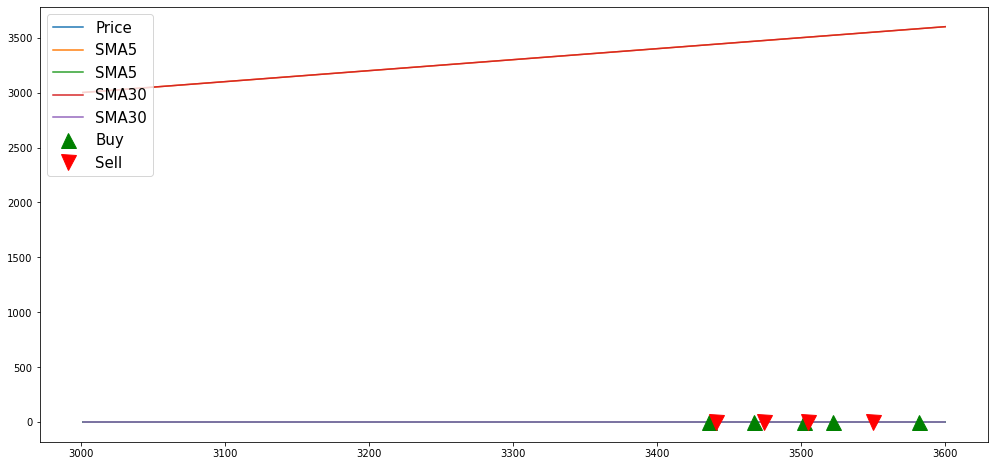

In [105]:
# taking last 600 trading days
SMA20 = df['Price'].rolling(window=20).mean()
SMA50 = df['Price'].rolling(window=50).mean()
plt.figure(figsize=(17, 8))
plt.plot(df['Price'][-600:], label='Price')
plt.plot(SMA5[-600:], label='SMA5')
plt.plot(SMA30[-600:], label='SMA30')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['level_0'][-5:], 
         crossovers['SMA5'][crossovers.Signal == 'Buy'][-5:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['level_0'][-4:], 
         crossovers['SMA5'][crossovers.Signal == 'Sell'][-4:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)